# 🎉 Exploring the Evolution of Age in Olympic Medalists! 🥇

As we delve into the rich history of the Olympic Games, it's fascinating to see how the age of medal winners has evolved over time. Here's a quick dive into some interesting trends:

## 1- Average Age of Gold Medal Winners: 
The average age of gold medalists has seen significant fluctuations, with recent years showing an increase. This trend suggests that experience is a key factor in securing the top spot on the podium.

## 2- Average Age of All Medal Winners:
The average age across all medal winners has followed a similar upward trend, indicating that athletes are competing—and winning—at older ages than in the past.

## 3- Median Age of Gold Medal Winners:
The median age of gold medal winners also highlights the importance of experience, with a noticeable increase in recent years.

## 4- Median Age of All Medal Winners:
The median age of all medalists has gradually increased over the years, reflecting changes in athlete longevity and advancements in sports science.

Source of data for Olympic Summer & Winter Games, 1896-2022:
https://www.kaggle.com/datasets/piterfm/olympic-games-medals-19862018

Source of data for Olympic Summer 2024: 
https://www.kaggle.com/datasets/piterfm/paris-2024-olympic-summer-games

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data files
athletes_df = pd.read_csv(r"..\olympics\Historical\olympic_athletes.csv")
medals_df = pd.read_csv(r"..\olympics\Historical\olympic_medals.csv")
medallists_df = pd.read_csv(r"..\olympics\Historical\Paris_2024\medallists.csv")

In [2]:
athletes_df.head(2)

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
0,https://olympics.com/en/athletes/cooper-woods-...,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000.0,NaN,NaN
1,https://olympics.com/en/athletes/elofsson,Felix ELOFSSON,2,PyeongChang 2018,1995.0,NaN,NaN


In [3]:
medals_df.head(2)

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA


In [4]:
medals_df['athlete_full_name'] = medals_df['athlete_full_name'].str.strip().str.lower()
athletes_df['athlete_full_name'] = athletes_df['athlete_full_name'].str.strip().str.lower()

In [5]:
# Filter gold medal winners
gold_medals_df = medals_df[medals_df['medal_type'] == 'GOLD']

# Merge gold medal winners with athletes data to get the ages
gold_medal_athletes = pd.merge(gold_medals_df, athletes_df, on='athlete_full_name')
gold_medal_athletes.head(2)

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url_x,athlete_full_name,country_name,country_code,country_3_letter_code,athlete_url_y,games_participations,first_game,athlete_year_birth,athlete_medals,bio
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,stefania constantini,Italy,IT,ITA,https://olympics.com/en/athletes/stefania-cons...,1,Beijing 2022,1999.0,\n\n\n1\n\nG\n\n,NaN
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,amos mosaner,Italy,IT,ITA,https://olympics.com/en/athletes/amos-mosaner,2,PyeongChang 2018,1995.0,\n\n\n1\n\nG\n\n,NaN


In [6]:
# Extract the game year from the 'slug_game' column in gold_medals_df
gold_medals_df['game_year'] = gold_medals_df['slug_game'].str.extract(r'(\d{4})').astype(int)
# Extract the game year from the 'slug_game' column in gold_medals_df using .loc to avoid the warning
gold_medals_df.head(3)

C:\Users\lasra\AppData\Local\Temp\ipykernel_3476\1327509955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold_medals_df['game_year'] = gold_medals_df['slug_game'].str.extract(r'(\d{4})').astype(int)


,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,game_year
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,stefania constantini,Italy,IT,ITA,2022
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,amos mosaner,Italy,IT,ITA,2022
6,Curling,beijing-2022,Women,Women,GOLD,GameTeam,Great Britain,NaN,NaN,Great Britain,GB,GBR,2022


In [7]:
# Merge gold medal winners with athletes data to get the birth year of athletes
gold_medal_athletes = pd.merge(gold_medals_df, athletes_df, on='athlete_full_name')

# Calculate the age of the athletes at the time of the Olympic Games
gold_medal_athletes['age'] = gold_medal_athletes['game_year'] - gold_medal_athletes['athlete_year_birth']

# Calculate the median age of gold medal winners for each Olympic year
median_age_gold_medals_per_year = round(gold_medal_athletes.groupby('game_year')['age'].median().reset_index(),2)

In [8]:
median_age_gold_medals_per_year.head(3)

,game_year,age
0,1896,22.0
1,1900,25.0
2,1904,25.0


In [9]:
# No need to filter for only gold medals, so we'll consider all medals

# Extract the game year from the 'slug_game' column in medals_df
medals_df['game_year'] = medals_df['slug_game'].str.extract(r'(\d{4})').astype(int)
medals_df.head(2)

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,game_year
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,stefania constantini,Italy,IT,ITA,2022
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,amos mosaner,Italy,IT,ITA,2022


In [10]:
# Merge all medal winners with athletes data to get the birth year of athletes
medal_athletes = pd.merge(medals_df, athletes_df, on='athlete_full_name')

medal_athletes.head(2)

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url_x,athlete_full_name,country_name,country_code,country_3_letter_code,game_year,athlete_url_y,games_participations,first_game,athlete_year_birth,athlete_medals,bio
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,stefania constantini,Italy,IT,ITA,2022,https://olympics.com/en/athletes/stefania-cons...,1,Beijing 2022,1999.0,\n\n\n1\n\nG\n\n,NaN
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,amos mosaner,Italy,IT,ITA,2022,https://olympics.com/en/athletes/amos-mosaner,2,PyeongChang 2018,1995.0,\n\n\n1\n\nG\n\n,NaN


In [11]:
# Calculate the age of the athletes at the time of the Olympic Games
medal_athletes['age'] = medal_athletes['game_year'] - medal_athletes['athlete_year_birth']

# Calculate the average age of all medal winners for each Olympic year
median_age_all_medals_per_year = round(medal_athletes.groupby('game_year')['age'].median().reset_index(),2)

In [12]:
median_age_all_medals_per_year.head(3)

,game_year,age
0,1896,23.0
1,1900,24.0
2,1904,24.0


In [13]:
medallists_df.head(2)

,medal_date,medal_type,medal_code,name,gender,country,country_code,nationality,team,team_gender,discipline,event,event_type,url_event,birth_date,code
0,2024-07-27,Gold Medal,1,EVENEPOEL Remco,Male,Belgium,BEL,Belgium,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,2000-01-25,1903136
1,2024-07-27,Silver Medal,2,GANNA Filippo,Male,Italy,ITA,Italy,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1996-07-25,1923520


In [14]:
# Preprocess the medallists dataset to extract the birth year and medal year
medallists_df['birth_year'] = pd.to_datetime(medallists_df['birth_date']).dt.year
medallists_df['medal_year'] = pd.to_datetime(medallists_df['medal_date']).dt.year

In [15]:
# Using the birth date and medal date from the `medallists.csv` file

# Calculate the age of the athletes at the time of the Olympic Games
medallists_df['age'] = medallists_df['medal_year'] - medallists_df['birth_year']

# Calculate the median age of all medal winners for each Olympic year
median_age_all_medals_2024 = medallists_df.groupby('medal_year')['age'].median().reset_index()
median_age_all_medals_2024


,medal_year,age
0,2024,27.0


In [16]:
# Filter gold medal winners
gold_medalists_df = medallists_df[medallists_df['medal_type'] == 'Gold Medal']
gold_medalists_df.head(3)

,medal_date,medal_type,medal_code,name,gender,country,country_code,nationality,team,team_gender,discipline,event,event_type,url_event,birth_date,code,birth_year,medal_year,age
0,2024-07-27,Gold Medal,1,EVENEPOEL Remco,Male,Belgium,BEL,Belgium,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,2000-01-25,1903136,2000.0,2024,24.0
3,2024-07-27,Gold Medal,1,BROWN Grace,Female,Australia,AUS,Australia,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1992-07-07,1940173,1992.0,2024,32.0
6,2024-07-27,Gold Medal,1,OH Sanguk,Male,Korea,KOR,Korea,NaN,NaN,Fencing,Men's Sabre Individual,HATH,/en/paris-2024/results/fencing/men-s-sabre-ind...,1996-09-30,1927149,1996.0,2024,28.0


In [17]:
median_age_gold_medals_2024 = gold_medalists_df.groupby('medal_year')['age'].median().reset_index()
median_age_gold_medals_2024

,medal_year,age
0,2024,27.0


In [18]:
median_age_all_medals_2024 = pd.DataFrame({'game_year': [2024], 'age': [27.0]})
median_age_gold_2024 = pd.DataFrame({'game_year': [2024], 'age': [27.0]})

In [19]:
median_age_all_medals_per_year = pd.concat([median_age_all_medals_per_year, median_age_all_medals_2024], ignore_index=True)
median_age_gold_medals_per_year = pd.concat([median_age_gold_medals_per_year , median_age_gold_2024], ignore_index=True)


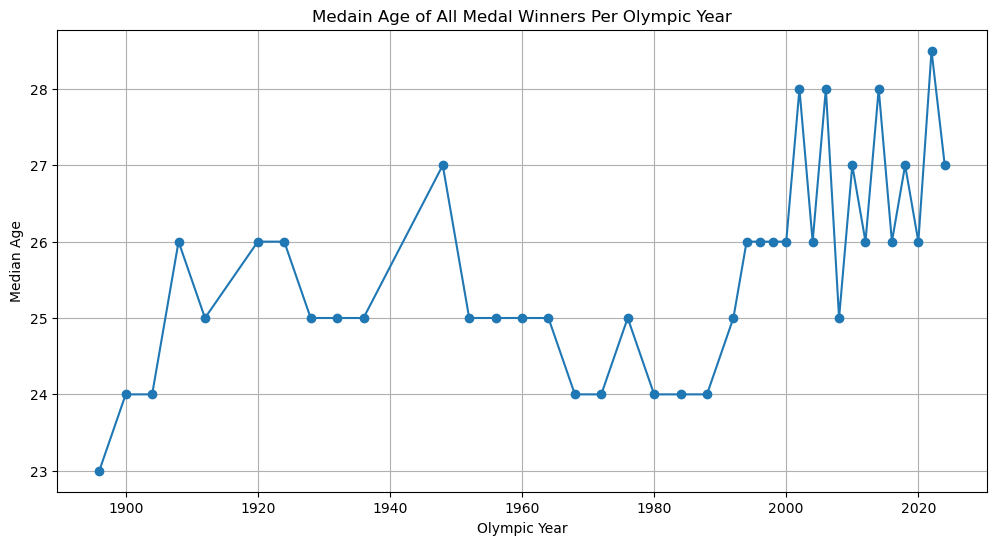

In [20]:
# Plotting the average age of all medal winners per Olympic year
plt.figure(figsize=(12, 6))
plt.plot(median_age_all_medals_per_year['game_year'], median_age_all_medals_per_year['age'], marker='o')
plt.title('Medain Age of All Medal Winners Per Olympic Year')
plt.xlabel('Olympic Year')
plt.ylabel('Median Age')
plt.grid(True)
plt.show()

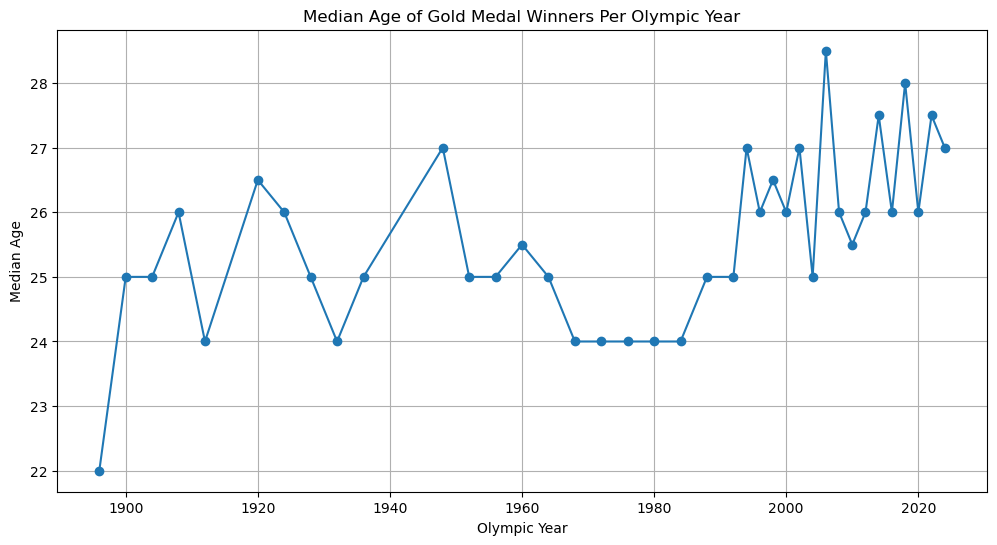

In [21]:
# Plotting the average age of gold medal winners per Olympic year
plt.figure(figsize=(12, 6))
plt.plot(median_age_gold_medals_per_year['game_year'], median_age_gold_medals_per_year['age'], marker='o')
plt.title('Median Age of Gold Medal Winners Per Olympic Year')
plt.xlabel('Olympic Year')
plt.ylabel('Median Age')
plt.grid(True)
plt.show()

In [22]:
# Calculate the mean age of gold medal winners for each Olympic year
average_age_gold_medals_per_year = round(gold_medal_athletes.groupby('game_year')['age'].mean().reset_index(),2)
average_age_gold_medals_per_year.tail(3)

,game_year,age
34,2018,27.70
35,2020,25.89
36,2022,27.95


In [23]:
average_age_all_medals_per_year = round(medal_athletes.groupby('game_year')['age'].mean().reset_index(),2)
average_age_all_medals_per_year.tail (3)

,game_year,age
34,2018,27.38
35,2020,26.33
36,2022,28.40


In [24]:
average_age_all_medals_2024 = medallists_df.groupby('medal_year')['age'].mean().reset_index()
average_age_all_medals_2024

,medal_year,age
0,2024,26.932948


In [25]:
average_age_gold_medals_2024 = gold_medalists_df.groupby('medal_year')['age'].mean().reset_index()
average_age_gold_medals_2024

,medal_year,age
0,2024,27.031464


In [26]:
average_age_all_medals_2024 = pd.DataFrame({'game_year': [2024], 'age': [26.93]})
average_age_gold_medals_2024 = pd.DataFrame({'game_year': [2024], 'age': [27.03]})

In [28]:
average_age_gold_medals_2024

,game_year,age
0,2024,27.03


In [29]:
average_age_all_medals_per_year = pd.concat([average_age_all_medals_per_year, average_age_all_medals_2024], ignore_index=True)
average_age_gold_medals_per_year = pd.concat([average_age_gold_medals_per_year, average_age_gold_medals_2024], ignore_index=True)

In [30]:
average_age_all_medals_per_year.tail()

,game_year,age
33,2016,26.93
34,2018,27.38
35,2020,26.33
36,2022,28.40
37,2024,26.93


In [31]:
average_age_gold_medals_per_year.tail()

,game_year,age
33,2016,26.87
34,2018,27.70
35,2020,25.89
36,2022,27.95
37,2024,27.03


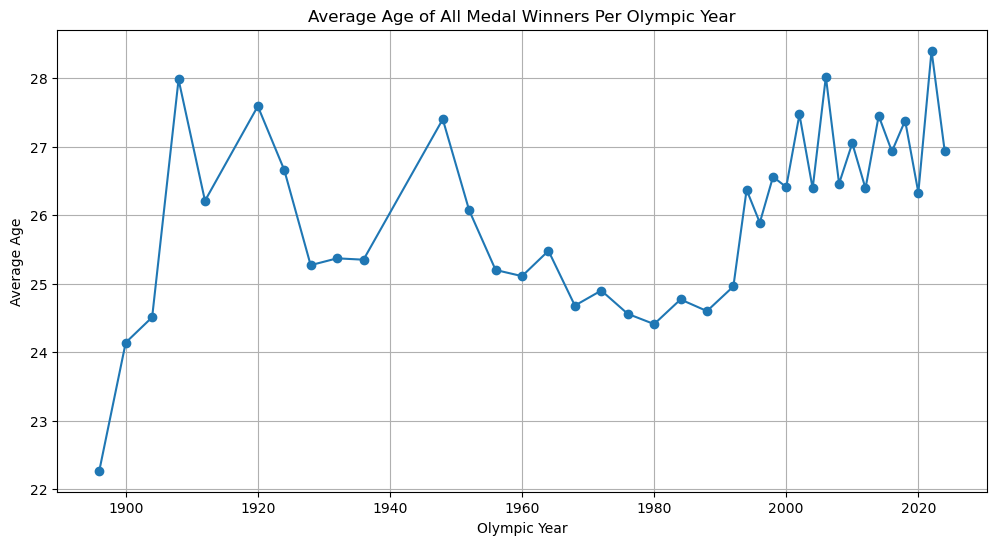

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(average_age_all_medals_per_year['game_year'], average_age_all_medals_per_year['age'], marker='o')
plt.title('Average Age of All Medal Winners Per Olympic Year')
plt.xlabel('Olympic Year')
plt.ylabel('Average Age')
plt.grid(True)
plt.show()

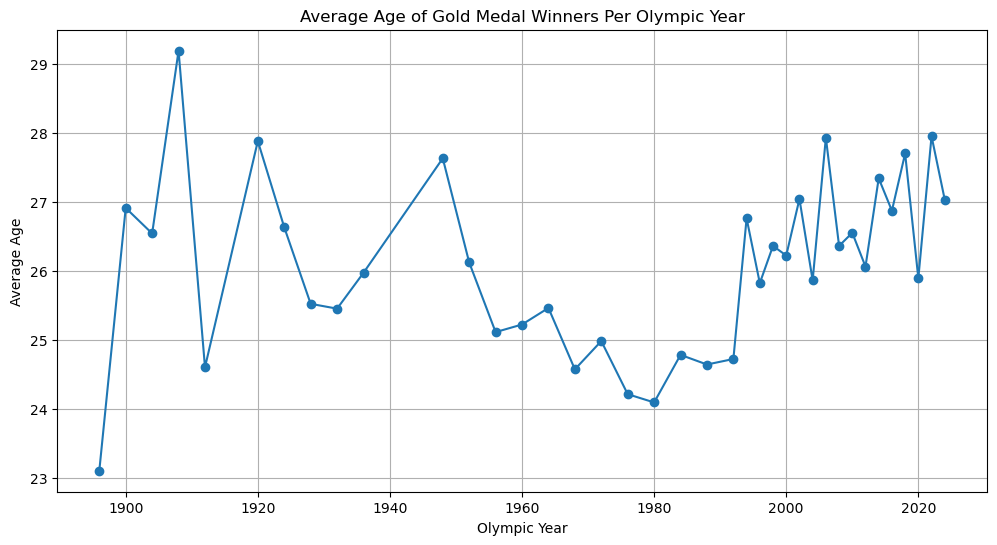

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(average_age_gold_medals_per_year['game_year'], average_age_gold_medals_per_year['age'], marker='o')
plt.title('Average Age of Gold Medal Winners Per Olympic Year')
plt.xlabel('Olympic Year')
plt.ylabel('Average Age')
plt.grid(True)
plt.show()